In [2]:
import torch
import numpy as np
from torch import nn as nn
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from torch.distributions import MultivariateNormal

In [4]:
# 设置两个搞死分布的均值向量和协方差矩阵
mu1 = -3 * torch.ones(2)
mu2 = 3 * torch.ones(2)
sigma1 = torch.eye(2) * 0.5
sigma2 = torch.eye(2) * 2

In [5]:
#从两个高斯分布中生成100个样本
m1 = MultivariateNormal(mu1, sigma1)
m2 = MultivariateNormal(mu2, sigma2)
x1 = m1.sample((100,))
x2 = m2.sample((100,))

In [6]:
# 设置正负样本标签
y = torch.zeros((200, 1))
y[100:] = 1

In [7]:
y

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [8]:
x1

tensor([[-3.0115, -3.1570],
        [-3.2820, -2.8199],
        [-3.8903, -3.3757],
        [-3.5954, -3.6728],
        [-3.0373, -2.4311],
        [-4.0770, -3.4652],
        [-4.9680, -3.0805],
        [-3.0581, -2.5522],
        [-2.1052, -2.5181],
        [-3.2832, -4.0490],
        [-2.8205, -2.2023],
        [-2.6481, -3.2150],
        [-1.8242, -3.3092],
        [-3.1377, -2.7964],
        [-3.3494, -2.4842],
        [-2.6674, -3.9983],
        [-1.5724, -3.6368],
        [-1.6344, -2.8280],
        [-2.6693, -2.2826],
        [-2.5270, -2.9974],
        [-2.9173, -3.7954],
        [-3.1353, -3.5000],
        [-3.0166, -3.5602],
        [-3.6304, -3.1784],
        [-3.3202, -2.8054],
        [-4.1408, -2.3817],
        [-4.3310, -2.8913],
        [-2.4397, -2.8110],
        [-3.3863, -3.3508],
        [-3.3795, -3.1261],
        [-3.0965, -2.7804],
        [-2.3511, -2.5174],
        [-3.1759, -2.8327],
        [-4.1488, -2.9681],
        [-4.4632, -2.5089],
        [-1.8075, -2

In [9]:
# 组合打乱序号
x = torch.cat([x1, x2], dim=0)
idx = np.random.permutation(len(x))

In [10]:
x = x[idx]
y = y[idx]

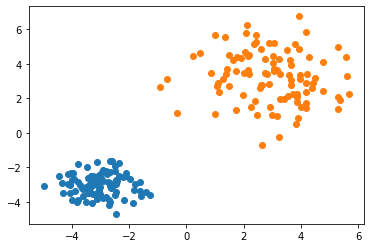

In [11]:
# 绘制样本
plt.scatter(x1.numpy()[:,0], x1.numpy()[:,1])
plt.scatter(x2.numpy()[:,0], x2.numpy()[:,1])

In [12]:
x1.numpy()[:,0]

array([-3.0115252, -3.282004 , -3.8903055, -3.5953846, -3.0373063,
       -4.076957 , -4.967968 , -3.0580838, -2.1052058, -3.283248 ,
       -2.820468 , -2.6480732, -1.8242047, -3.1376505, -3.3493564,
       -2.66743  , -1.5723529, -1.6343554, -2.6693363, -2.5269845,
       -2.9173245, -3.1353152, -3.0165734, -3.630431 , -3.3201637,
       -4.1407948, -4.3309817, -2.4396675, -3.386319 , -3.3794596,
       -3.096474 , -2.3510687, -3.1758747, -4.148795 , -4.463201 ,
       -1.8075016, -1.9578651, -2.9052496, -2.7136679, -3.264892 ,
       -2.6562476, -2.755227 , -2.692284 , -3.3780916, -2.2110415,
       -3.4425743, -3.2498388, -3.7941647, -3.0667052, -3.9354556,
       -2.610805 , -3.250779 , -3.6281624, -2.9066827, -3.5025153,
       -3.4889295, -2.588691 , -1.4232707, -1.276681 , -3.4148984,
       -3.9565115, -3.7743635, -3.1261268, -3.7816794, -1.6307658,
       -3.438511 , -2.3452134, -4.0107985, -3.825966 , -3.4315996,
       -2.9449074, -2.484326 , -2.4527483, -3.490333 , -3.4107

In [16]:
class LogisticRegression(nn.Module):
    def __init__(self, D_in):
        super(LogisticRegression, self).__init__()
        self.liner = nn.Linear(D_in, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.liner(x)
        output = self.sigmoid(x)
        return output
    
lr_model = LogisticRegression(2)
loss = nn.MSELoss()
loss(lr_model(x), y)
        

tensor(0.1338, grad_fn=<MseLossBackward0>)

In [17]:
from torch import optim
optimizer = optim.SGD(lr_model.parameters(), lr=0.03)

In [19]:
batch_size = 10
iters = 10
for _ in range(iters):
    for i in range(int(len(x)/batch_size)):
        input = x[i * batch_size : ((i+1) * batch_size)]
        target = y[i * batch_size : ((i+1) * batch_size)] 
        optimizer.zero_grad()
        output = lr_model(input)
        l = loss(output, target)
        l.backward()
        optimizer.step()

In [20]:
pred_neg = (output <= 0.5).view(-1)
pred_pos = (output > 0.5).view(-1)
plt.scatter(x[pred_neg,0], x[pred_neg,1])
plt.scatter(x[pred_pos,0], x[pred_pos,1])

IndexError: The shape of the mask [10] at index 0 does not match the shape of the indexed tensor [200] at index 0